In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysd
from SALib.sample import saltelli
from SALib.analyze import sobol
import scipy as sp

# Load Model

In [2]:
model_cal = pysd.read_vensim("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/model/transmission/finalCalibratedModel.mdl")

In [3]:
model_cal_output = model_cal.run()
display(model_cal_output)

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Total TB deaths,Susceptible,initial detected,Detected and Treated TB,Detection,Cumulative Cases,...,deaths T,total pop,general mortality,infection,initial incident,initial latent,Latent TB infection,relapse rate,transmission rate,progression rate
2000,2021,2000,1,1,0.000000,3.482561e+07,215000,2.150000e+05,906664.600000,0.000000e+00,...,1720.000000,3.800000e+07,0.008,665281.841318,1971010.0,988381,9.883810e+05,0.004,0.3683,0.156
2001,2021,2000,1,1,73912.875000,3.494572e+07,215000,1.119085e+06,519667.465260,1.541874e+05,...,8952.676800,3.868609e+07,0.008,375844.873384,1971010.0,988381,1.491568e+06,0.004,0.3683,0.156
2002,2021,2000,1,1,116277.070537,3.537352e+07,215000,1.625323e+06,329960.897795,3.083749e+05,...,13002.584400,3.941744e+07,0.008,237080.700039,1971010.0,988381,1.701293e+06,0.004,0.3683,0.156
2003,2021,2000,1,1,143176.056771,3.595714e+07,215000,1.935780e+06,246187.048967,4.823549e+05,...,15486.240570,4.017889e+07,0.008,176399.060010,1971010.0,988381,1.750784e+06,0.004,0.3683,0.156
2004,2021,2000,1,1,163245.653154,3.661809e+07,215000,2.158738e+06,215935.755748,6.793862e+05,...,17269.902075,4.096240e+07,0.008,154553.471602,1971010.0,988381,1.716145e+06,0.004,0.3683,0.156
2005,2021,2000,1,1,180849.111503,3.731754e+07,215000,2.348769e+06,210212.201889,8.956034e+05,...,18790.149296,4.176405e+07,0.008,150387.685712,1971010.0,988381,1.640752e+06,0.004,0.3683,0.156
2006,2021,2000,1,1,197985.975787,3.803801e+07,215000,2.530796e+06,213705.004628,1.124806e+06,...,20246.365120,4.258219e+07,0.008,152843.982727,1971010.0,988381,1.548811e+06,0.004,0.3683,0.156
2007,2021,2000,1,1,215407.579426,3.877316e+07,215000,2.714131e+06,218870.262374,1.360755e+06,...,21713.048775,4.341641e+07,0.008,156497.685695,1971010.0,988381,1.453316e+06,0.004,0.3683,0.156
2008,2021,2000,1,1,233250.263858,3.952214e+07,215000,2.900432e+06,222418.955628,1.598133e+06,...,23203.454289,4.426690e+07,0.008,158992.639616,1971010.0,988381,1.360809e+06,0.004,0.3683,0.156
2009,2021,2000,1,1,250777.844601,4.028644e+07,215000,3.088046e+06,223558.171365,1.832822e+06,...,24704.364482,4.513471e+07,0.008,159765.387403,1971010.0,988381,1.274226e+06,0.004,0.3683,0.156


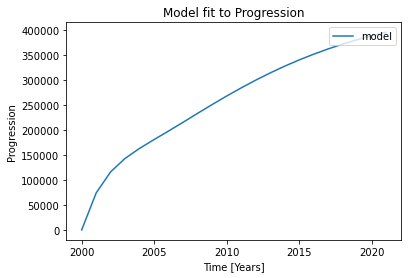

In [6]:
plt.plot(model_cal_output.index, model_cal_output['Total TB deaths'],label="model")
plt.xlabel('Time [Years]')
plt.ylabel('Progression')
plt.title('Model fit to Progression')
plt.legend(loc='upper right')
#plt.text(30,750000000, 'RMSE: 7.39% of Max', color='r', fontsize=12)

# Sobel Indices - progression

Consider several of calibrated model parameters and their effect on progression for 2005 (peak) and 10 years later (2015)

In [27]:
# define problem for determining the sensitivity indices using SALib

observable = "progression"
parameter1 = 'transmission rate'
parameter2 = 'relapse rate'
parameter3="progression rate"
parameter4 = 'progression time'




problem1 = {
    'num_vars': 4,
    'names': ['transmisison rate', 'relapse rate','progression rate','progression time'],
    'bounds': [[0.331,0.405],
               [0.0036, 0.0044],
               [0.141,0.171],
               [3.5694,4.3636]]
}

# calculate sample points used for sensitivity analysis
param_values = saltelli.sample(problem1, 128, calc_second_order=False)

                         ST       ST_conf
transmisison rate  0.291433  6.987783e-02
relapse rate       0.000001  2.840759e-07
progression rate   0.670325  1.535191e-01
progression time   0.041232  1.077454e-02
                         S1   S1_conf
transmisison rate  0.282611  0.111835
relapse rate       0.000006  0.000311
progression rate   0.666424  0.198001
progression time   0.038738  0.045671


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

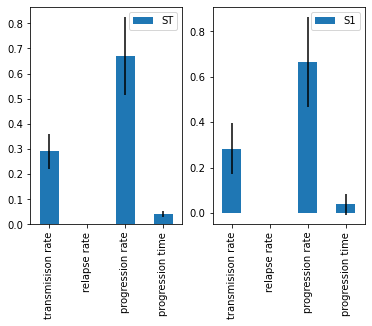

In [28]:
#Progression time poitn 2005
# array for observable values
Y = np.zeros([param_values.shape[0]])

# loop through all parameter combinations in the sample
for i, X in enumerate(param_values):
    param1_val, param2_val,param3_val,param4_val = X

    # store observable value at this parameter combination
    # again, we want to ignore warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        Y[i] = model_cal.run(params={parameter1: param1_val, parameter2: param2_val,parameter3: param3_val,parameter4: param4_val},
                         return_timestamps=[2005],
                         return_columns=[observable]).loc[2005, observable]
        
# perform calculation of sensitivity indices for 2005
Si = sobol.analyze(problem, Y, calc_second_order=False, print_to_console=True)
Si.plot()


                         ST   ST_conf
transmisison rate  0.943808  0.179176
relapse rate       0.000571  0.000148
progression rate   0.046885  0.012704
progression time   0.017628  0.003830
                         S1   S1_conf
transmisison rate  0.939087  0.212821
relapse rate       0.000320  0.006563
progression rate   0.043664  0.055431
progression time   0.016976  0.027191


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

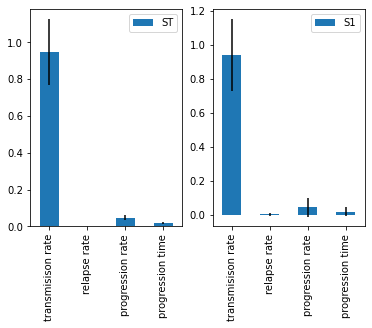

In [24]:
#Progression time poitn 2015
# array for observable values
Y = np.zeros([param_values.shape[0]])

# loop through all parameter combinations in the sample
for i, X in enumerate(param_values):
    param1_val, param2_val,param3_val,param4_val = X

    # store observable value at this parameter combination
    # again, we want to ignore warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        Y[i] = model_cal.run(params={parameter1: param1_val, parameter2: param2_val,parameter3: param3_val,parameter4: param4_val},
                         return_timestamps=[2015],
                         return_columns=[observable]).loc[2015, observable]
        
# perform calculation of sensitivity indices for 2020
Si = sobol.analyze(problem, Y, calc_second_order=False, print_to_console=True)
Si.plot()

# Sobel Indices - Total TB deaths

In [39]:

observable = "Total TB deaths"
parameter1 = 'transmission rate'
parameter2 = 'relapse rate'
parameter3="progression rate"
parameter4 = 'progression time'




problem = {
    'num_vars': 4,
    'names': ['transmisison rate', 'relapse rate','progression rate','progression time'],
    'bounds': [[0.331,0.405],
               [0.0036, 0.0044],
               [0.141,0.171],
               [3.5694,4.3636]]
}

# calculate sample points used for sensitivity analysis
param_values = saltelli.sample(problem, 128, calc_second_order=False)

                         ST   ST_conf
transmisison rate  0.010842  0.002262
relapse rate       0.000780  0.000191
progression rate   0.984054  0.177818
progression time   0.005051  0.001281
                         S1   S1_conf
transmisison rate  0.009281  0.025401
relapse rate       0.000834  0.006504
progression rate   0.983746  0.207932
progression time   0.004380  0.017476


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

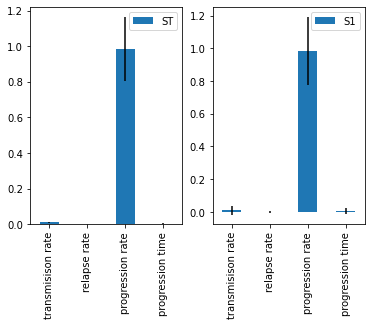

In [40]:
#TB deaths time poitn 2005
# array for observable values
Y = np.zeros([param_values.shape[0]])

# loop through all parameter combinations in the sample
for i, X in enumerate(param_values):
    param1_val, param2_val,param3_val,param4_val = X

    # store observable value at this parameter combination
    # again, we want to ignore warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        Y[i] = model_cal.run(params={parameter1: param1_val, parameter2: param2_val,parameter3: param3_val,parameter4: param4_val},
                         return_timestamps=[2005],
                         return_columns=[observable]).loc[2005, observable]
        
# perform calculation of sensitivity indices for 2005
Si = sobol.analyze(problem, Y, calc_second_order=False, print_to_console=True)
Si.plot()


                         ST   ST_conf
transmisison rate  0.387753  0.085720
relapse rate       0.002675  0.000794
progression rate   0.612015  0.139805
progression time   0.004967  0.001301
                         S1   S1_conf
transmisison rate  0.378810  0.156655
relapse rate       0.002678  0.014552
progression rate   0.606803  0.155691
progression time   0.004330  0.016158


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

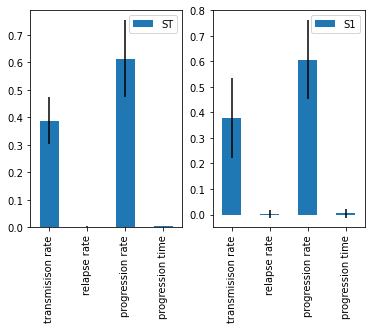

In [41]:
#TB deaths time poitn 2015
# array for observable values
Y = np.zeros([param_values.shape[0]])

# loop through all parameter combinations in the sample
for i, X in enumerate(param_values):
    param1_val, param2_val,param3_val,param4_val = X

    # store observable value at this parameter combination
    # again, we want to ignore warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        Y[i] = model_cal.run(params={parameter1: param1_val, parameter2: param2_val,parameter3: param3_val,parameter4: param4_val},
                         return_timestamps=[2015],
                         return_columns=[observable]).loc[2015, observable]
        
# perform calculation of sensitivity indices for 2020
Si = sobol.analyze(problem, Y, calc_second_order=False, print_to_console=True)
Si.plot()

# Sobel Indices - Cases

In [42]:
observable = "Cumulative Cases"
parameter1 = 'transmission rate'
parameter2 = 'relapse rate'
parameter3="progression rate"
parameter4 = 'progression time'




problem = {
    'num_vars': 4,
    'names': ['transmisison rate', 'relapse rate','progression rate','progression time'],
    'bounds': [[0.331,0.405],
               [0.0036, 0.0044],
               [0.141,0.171],
               [3.5694,4.3636]]
}

# calculate sample points used for sensitivity analysis
param_values = saltelli.sample(problem, 128, calc_second_order=False)

                             ST       ST_conf
transmisison rate  4.580692e-02  9.838380e-03
relapse rate       1.289212e-08  3.083075e-09
progression rate   9.394199e-01  1.850965e-01
progression time   1.560334e-02  3.991659e-03
                             S1   S1_conf
transmisison rate  4.239038e-02  0.060015
relapse rate       6.229097e-07  0.000027
progression rate   9.384465e-01  0.193718
progression time   1.426768e-02  0.029820


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

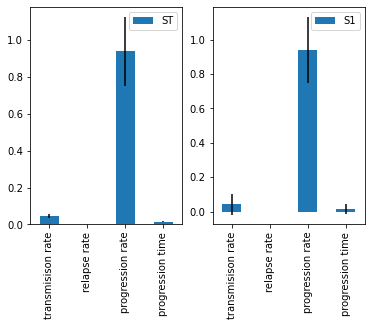

In [43]:
#Cases time poitn 2005
# array for observable values
Y = np.zeros([param_values.shape[0]])

# loop through all parameter combinations in the sample
for i, X in enumerate(param_values):
    param1_val, param2_val,param3_val,param4_val = X

    # store observable value at this parameter combination
    # again, we want to ignore warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        Y[i] = model_cal.run(params={parameter1: param1_val, parameter2: param2_val,parameter3: param3_val,parameter4: param4_val},
                         return_timestamps=[2005],
                         return_columns=[observable]).loc[2005, observable]
        
# perform calculation of sensitivity indices for 2005
Si = sobol.analyze(problem, Y, calc_second_order=False, print_to_console=True)
Si.plot()


                         ST   ST_conf
transmisison rate  0.509028  0.103993
relapse rate       0.000069  0.000018
progression rate   0.498459  0.131511
progression time   0.001187  0.000365
                         S1   S1_conf
transmisison rate  0.499699  0.143747
relapse rate       0.000051  0.001853
progression rate   0.492634  0.182866
progression time   0.000740  0.008605


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

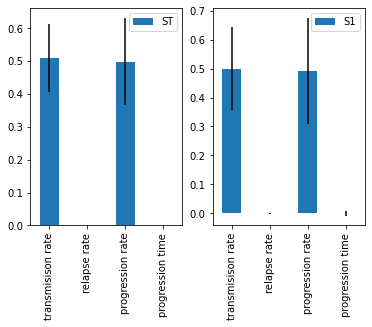

In [44]:
#Cases time poitn 2015
# array for observable values
Y = np.zeros([param_values.shape[0]])

# loop through all parameter combinations in the sample
for i, X in enumerate(param_values):
    param1_val, param2_val,param3_val,param4_val = X

    # store observable value at this parameter combination
    # again, we want to ignore warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        Y[i] = model_cal.run(params={parameter1: param1_val, parameter2: param2_val,parameter3: param3_val,parameter4: param4_val},
                         return_timestamps=[2015],
                         return_columns=[observable]).loc[2015, observable]
        
# perform calculation of sensitivity indices for 2015
Si = sobol.analyze(problem, Y, calc_second_order=False, print_to_console=True)
Si.plot()